# **Python beadandó**
#### *Készítette: Náday-Tauber Patrik*

Dolgozatomban a modellfutar.hu webshopról szedtem le makettek adatait, majd egy szófelhőben ábrázoltam a gyártók neveit.

In [47]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://www.modellfutar.hu/harci-jarmuvek-1-16-meretarany'
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers = {'User-Agent':user_agent,}

request = urllib.request.Request(url,None,headers)
response = urllib.request.urlopen(request)
data = response.read()
soup = BeautifulSoup(data, 'html.parser')

A soupot feldarabolom azon elemek szerint, amikből az információkat szeretném kinyerni.

In [48]:
elements = soup.find_all('div', {'class':'product__inner position-relative'})
oldalak = soup.find_all('div', {'class':'row gutters-10 align-items-center'})
titles = soup.find_all('div', {'class':'col col-rest-content'})

Kinyerem a termék nevét az elements-ből, ami szerint daraboltam fel a soupot korábban a könnyebb beazonosíthatósága érdekében kinyerem a hozzátartozó aloldal nevet is.

In [49]:
name_tag = elements[0].find('h2', {'class':'product__name text-uppercase font-weight-bold font-s font-md-m'})
name = name_tag.string.rsplit(' ', 1)[0]
name = str(name.rsplit(' ', 1)[0])
print(name)
type(name)
title = str(titles[0].find_all('span', {'class':'breadcrumb__text'})[2].string).strip()
print(title)
type(title)

Trumpeter Sd.Kfz
Harci jármű


str

In [50]:
plane_names = list()
for e in elements:
    try:
        name_tag = e.find('h2', {'class':'product__name text-uppercase font-weight-bold font-s font-md-m'})
        name = str(name_tag.string.rsplit(' ', 1)[0])
        plane_names.append(name)
    except:
        plane_names.append(None)

print(len(plane_names))
plane_names

21


['Trumpeter Sd.Kfz 251/22D',
 'Hobby Boss Pz.Kpfw. VI Tiger I - Early',
 '  Trumpeter Pz.Kpfw.VI Ausf.E Sd.Kfz.181 Tiger I (Late Production)',
 'Takom M29C Weasel',
 'Das Werk Sd.Kfz. 251/1 Ausf.D',
 'Trumpeter Sd.Kfz 251D',
 'Das Werk StuG III Ausf. G early with Winterketten',
 'Takom M50A1 Ontos W/Interior',
 'Trumpeter German Sd.Kfz 173 Jagdpanther Late Version',
 'Hobby Boss Pzkpfw 38(t) Ausf.E/F',
 'Trumpeter StuG.III Ausf.G Late Production(2in1)',
 'I Love Kit M4A3E8 Medium Tank - Early',
 '  Andy\'s Hobby M4A3E8 Sherman "Easy Eight"',
 'Takom Panzerjager IB mit 7.5cm StuK 40 L/48',
 'Takom 1/4-ton 4×4 G503 MB Utility Truck',
 'Trumpeter German Sd.Kfz 173 Jagdpanther Early Version',
 'Heller Pz.Kpfw.III Ausf. J,L,M (4in1)',
 'Das Werk Panzer III Ausf.J 3in1',
 'Das Werk StuG III Ausf.G early',
 '  Classy Hobby PzKpfw. II Ausf. L Luchs 9th Panzer Division',
 'Heller STUG III AUSF. G ']

A webshop kódjában a termék neve alatti doboz tartalmazza az adott termék legfontosabb adatait, így azokat egy listából kell majd kiszednem. Ennek a listának az első elemei a cikkszám, a méretarány és gyártó. Ezeket a df külön oszlopaiban helyezem el.


In [51]:
items = elements[0].find_all('div', {'class':'product__param-value col-6'})
item_number = str(items[0].string).strip()
print(item_number)

scale_tag = elements[0].find_all('div', {'class':'product__param-value col-6'})
scale = str(scale_tag[1].string).strip()
print(scale)

factories = elements[0].find_all('div', {'class':'product__param-value col-6'})
manufacturer = str(factories[2].string).strip()
print(manufacturer)

TRU00943
1:16
Trumpeter


Végig iterálok a termékeken és leszedem a cikkszámot, méretarányt és a gyártót.

In [52]:
item_list = list()
for e in elements:
    try:
      items = e.find_all('div', {'class':'product__param-value col-6'})
      item_number = str(items[0].string).strip()
      item_list.append(item_number)
    except:
        item_list.append(None)

print(len(item_list))
item_list

21


['TRU00943',
 'HB82607',
 'TRU00945',
 'TAK-2168',
 'DW16005',
 'TRU00942',
 'DW16003',
 'TAK-1019',
 'TRU00935',
 'HB82603',
 'TRU00947',
 'ILO61619',
 'AHHQ-001',
 'TAK-1018',
 'TAK-1016',
 'TRU00934',
 'HEL30321',
 'DW16002',
 'DW16001',
 'MC16001',
 'HEL30320']

In [53]:
scale_tag_list = list()
for e in elements:
    try:
      scale_tag = e.find_all('div', {'class':'product__param-value col-6'})
      scale = str(scale_tag[1].string).strip()
      scale_tag_list.append(scale)
    except:
      scale_tag_list.append(None)

print(len(scale_tag_list))
scale_tag_list

21


['1:16',
 '1:16',
 '1:16',
 '1:35',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16',
 '1:16']

In [54]:
factory_list = list()
for e in elements:
    try:
      factories = e.find_all('div', {'class':'product__param-value col-6'})
      manufacturer = str(factories[2].string).strip()
      factory_list.append(manufacturer)
    except:
      factory_list.append(None)

print(len(factory_list))
factory_list

21


['Trumpeter',
 'Hobby Boss',
 'Trumpeter',
 'Takom',
 'Das Werk',
 'Trumpeter',
 'Das Werk',
 'Takom',
 'Trumpeter',
 'Hobby Boss',
 'Trumpeter',
 'I Love Kit',
 "Andy's Hobby",
 'Takom',
 'Takom',
 'Trumpeter',
 'Heller',
 'Das Werk',
 'Das Werk',
 'Classy Hobby',
 'Heller']

In [55]:
factory_list = list()
for e in elements:
    try:
      factories = e.find_all('div', {'class':'product__param-value col-6'})
      manufacturer = str(factories[2].string).strip()
      factory_list.append(manufacturer)
    except:
      factory_list.append(None)

print(len(factory_list))
factory_list

21


['Trumpeter',
 'Hobby Boss',
 'Trumpeter',
 'Takom',
 'Das Werk',
 'Trumpeter',
 'Das Werk',
 'Takom',
 'Trumpeter',
 'Hobby Boss',
 'Trumpeter',
 'I Love Kit',
 "Andy's Hobby",
 'Takom',
 'Takom',
 'Trumpeter',
 'Heller',
 'Das Werk',
 'Das Werk',
 'Classy Hobby',
 'Heller']

Mivel az ár a doboz másik felén volt, úgy kicsit másként kellett kiszednem az árat, melyet integer-ként tárolok. Valamiért az "e" iterációs változó nem működött az item_list indexálásához, így egyszerűbb volt megkerülni a problémát egy külső iterációs változóval.

In [56]:
price_list = list()
i = 0
for e in elements:
    try:
      elem = 'price_net_brutto_artlist_' + str(item_list[i])
      price = e.find('span', {'class': elem}).text.strip()
      price = int(price.replace(' ', ''))
      price_list.append(price)
    except:
      price_list.append(None)
    i += 1
print(len(price_list))
price_list

21


[51300,
 39480,
 99200,
 None,
 47990,
 32990,
 46990,
 None,
 102290,
 54770,
 69290,
 88990,
 None,
 None,
 None,
 113340,
 54950,
 52200,
 51120,
 41900,
 47380]

In [57]:
elem = 'price_net_brutto_artlist_' + str(item_list[0])
prices = elements[0].find('span', {'class': elem}).text.strip()
price = int(prices.replace(' ', ''))
print(price)

print(item_list[0])

51300
TRU00943


In [58]:
df = pd.DataFrame()
df['név'] = plane_names
df['cikkszám'] = item_list
df['méretarány'] = scale_tag_list
df['gyártó'] = factory_list
df['ár'] = price_list
df

,név,cikkszám,méretarány,gyártó,ár
0,Trumpeter Sd.Kfz 251/22D,TRU00943,1:16,Trumpeter,51300.0
1,Hobby Boss Pz.Kpfw. VI Tiger I - Early,HB82607,1:16,Hobby Boss,39480.0
2,Trumpeter Pz.Kpfw.VI Ausf.E Sd.Kfz.181 Tiger...,TRU00945,1:16,Trumpeter,99200.0
3,Takom M29C Weasel,TAK-2168,1:35,Takom,NaN
4,Das Werk Sd.Kfz. 251/1 Ausf.D,DW16005,1:16,Das Werk,47990.0
5,Trumpeter Sd.Kfz 251D,TRU00942,1:16,Trumpeter,32990.0
6,Das Werk StuG III Ausf. G early with Winterketten,DW16003,1:16,Das Werk,46990.0
7,Takom M50A1 Ontos W/Interior,TAK-1019,1:16,Takom,NaN
8,Trumpeter German Sd.Kfz 173 Jagdpanther Late V...,TRU00935,1:16,Trumpeter,102290.0
9,Hobby Boss Pzkpfw 38(t) Ausf.E/F,HB82603,1:16,Hobby Boss,54770.0


A következőben a már megismert aloldal lapozható részeiről gyűjtöttem le a termékeket.

In [67]:
oldalak = soup.find_all('div', {'class':'row gutters-10 align-items-center'})
oldalak[0]
pages = int(oldalak[0].find('a', {'class':'page-link icon--arrow-last'})['href'][-1:])
pages

3

In [68]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plane_names = list()
item_list = list()
scale_tag_list = list()
factory_list = list()
price_list = list()
item_types_list = list()

url = 'https://www.modellfutar.hu/harci-jarmuvek-1-16-meretarany'
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

headers = {'User-Agent':user_agent,}

request = urllib.request.Request(url,None,headers)
response = urllib.request.urlopen(request)
data = response.read()
soup = BeautifulSoup(data, 'html.parser')

oldalak = 0
pages = 0
titles = 0
titles = soup.find_all('div', {'class':'col col-rest-content'})
title = str(titles[0].find_all('span', {'class':'breadcrumb__text'})[2].string.strip())
oldalak = soup.find_all('div', {'class':'row gutters-10 align-items-center'})
try:
  pages = int(oldalak[0].find('a', {'class':'page-link icon--arrow-last'})['href'][-2:])
except:
  pages = int(oldalak[0].find('a', {'class':'page-link icon--arrow-last'})['href'][-1:])

for i in range(1,pages):
    url = 'https://www.modellfutar.hu/harci-jarmuvek-1-16-meretarany'
    if i > 1:
      url = 'https://www.modellfutar.hu/harci-jarmuvek-1-16-meretarany,' + str(i)

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers = {'User-Agent':user_agent,}
    request = urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'html.parser')
    elements = soup.find_all('div', {'class':'product__inner position-relative'})

    for e in elements:
      try:
        name_tag = e.find('h2', {'class':'product__name text-uppercase font-weight-bold font-s font-md-m'})
        name = str(name_tag.string.rsplit(' ', 1)[0])
        plane_names.append(name)
      except:
        plane_names.append(None)

      try:
        items = e.find_all('div', {'class':'product__param-value col-6'})
        item_number = str(items[0].string).strip()
        item_list.append(item_number)
      except:
        item_list.append(None)

      try:
        scale_tag = e.find_all('div', {'class':'product__param-value col-6'})
        scale = str(scale_tag[1].string).strip()
        scale_tag_list.append(scale)
      except:
        scale_tag_list.append(None)

      try:
        factories = e.find_all('div', {'class':'product__param-value col-6'})
        manufacturer = str(factories[2].string).strip()
        factory_list.append(manufacturer)
      except:
        factory_list.append(None)

      try:
        elem = 'price_net_brutto_artlist_' + item_number
        price = e.find('span', {'class': elem}).text.strip()
        price = int(price.replace(' ', ''))
        price_list.append(price)
      except:
        price_list.append(None)

      item_types_list.append(title)

df = pd.DataFrame()
df['név'] = plane_names
df['típus'] = item_types_list
df['cikkszám'] = item_list
df['méretarány'] = scale_tag_list
df['gyártó'] = factory_list
df['ár'] = price_list
df

,név,típus,cikkszám,méretarány,gyártó,ár
0,Trumpeter Sd.Kfz 251/22D,Harci jármű,TRU00943,1:16,Trumpeter,51300.0
1,Hobby Boss Pz.Kpfw. VI Tiger I - Early,Harci jármű,HB82607,1:16,Hobby Boss,39480.0
2,Trumpeter Pz.Kpfw.VI Ausf.E Sd.Kfz.181 Tiger...,Harci jármű,TRU00945,1:16,Trumpeter,99200.0
3,Takom M29C Weasel,Harci jármű,TAK-2168,1:35,Takom,NaN
4,Das Werk Sd.Kfz. 251/1 Ausf.D,Harci jármű,DW16005,1:16,Das Werk,47990.0
5,Trumpeter Sd.Kfz 251D,Harci jármű,TRU00942,1:16,Trumpeter,32990.0
6,Das Werk StuG III Ausf. G early with Winterketten,Harci jármű,DW16003,1:16,Das Werk,46990.0
7,Takom M50A1 Ontos W/Interior,Harci jármű,TAK-1019,1:16,Takom,NaN
8,Trumpeter German Sd.Kfz 173 Jagdpanther Late V...,Harci jármű,TRU00935,1:16,Trumpeter,102290.0
9,Hobby Boss Pzkpfw 38(t) Ausf.E/F,Harci jármű,HB82603,1:16,Hobby Boss,54770.0


Szófelhővel vizualizálom a dataframet.

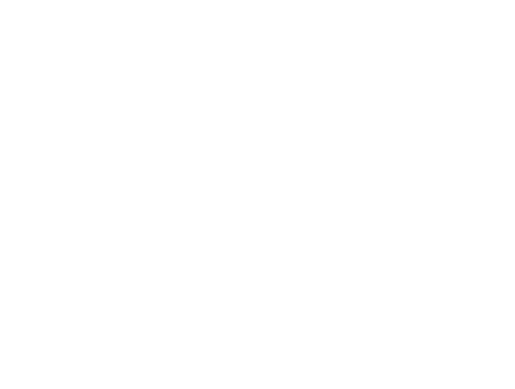

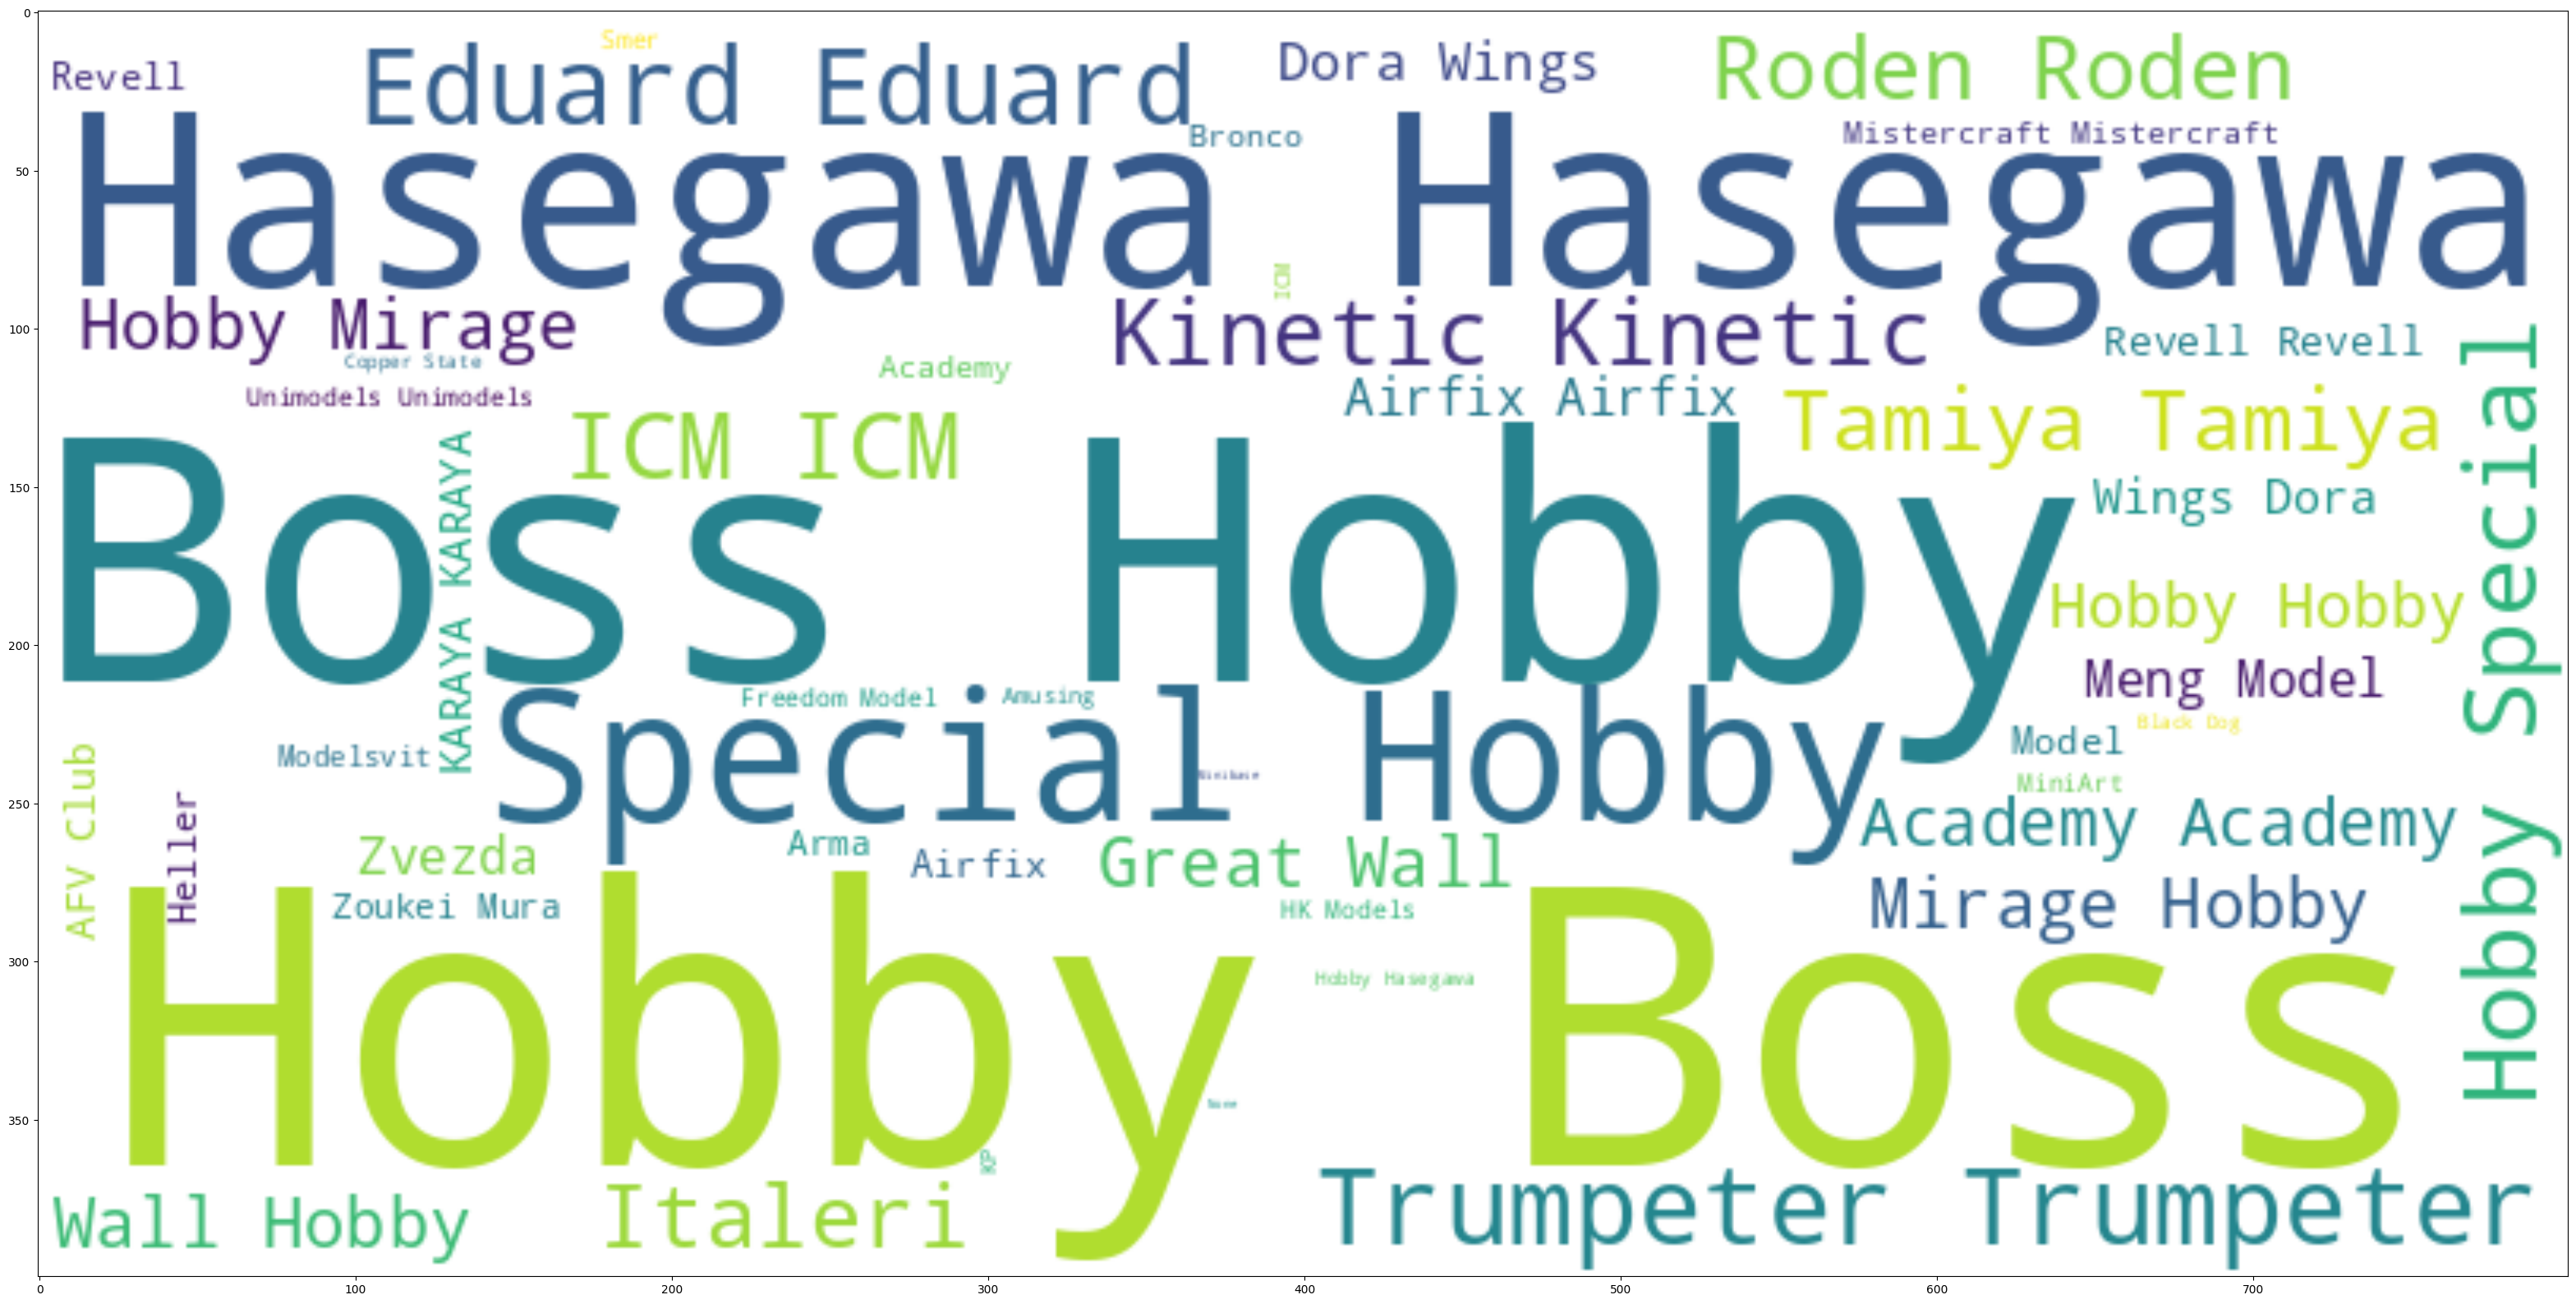

In [43]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(df.gyártó.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Az alábbiakban a modellfutar.hu oldalról az "urls"-be gyűjtöttem azokat az aloldalakat, amiket a fentiek szerint szeretnék lescrapelni. Fentre egy plusz for ciklust raktam, ami az url-eken megy végig és végigjárja a weboldal megadott részeit, ugyanazon dataframebe gyűjtve az adatokat. A dataframe felépítésénél törekedtem a tidy data koncepcióra, a változók az oszlopok és minden termék külön sorban szerepel. A végső kód valamiért 403: forbidden hibával megállt egy ponton, lehet túl sok volt a webshopnak? Mindenesetre külön-külön működött az eredeti kód, amikor a hibákat kerestem.

In [69]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plane_names = list()
item_list = list()
scale_tag_list = list()
factory_list = list()
price_list = list()
item_types_list = list()
h = 1
url = None
#Ide gyűjtöttem össze azokat az aloldalakat, amiken makettek szerepelnek.
urls = ['https://www.modellfutar.hu/komplett-keszletek', 'https://www.modellfutar.hu/harci-jarmuvek-1-16-meretarany', 'https://www.modellfutar.hu/harci-jarmuvek-1-35-meretarany', 'https://www.modellfutar.hu/harci-jarmuvek-1-48-meretarany', 'https://www.modellfutar.hu/harci-jarmuvek-1-72-meretarany', 'https://www.modellfutar.hu/harci-jarmuvek-1-76-meretarany', 'https://www.modellfutar.hu/harci-jarmuvek-1-144-meretarany', 'https://www.modellfutar.hu/katonai-jarmuvek', 'https://www.modellfutar.hu/lovegek', 'https://www.modellfutar.hu/helikopterek', 'https://www.modellfutar.hu/katonai-repulok-1-18-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-24-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-28-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-32-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-35-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-48-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-72-meretarany', 'https://www.modellfutar.hu/katonai-repulok-1-144-meretarany', 'https://www.modellfutar.hu/polgari-repulok', 'https://www.modellfutar.hu/vonatok-villamosok', 'https://www.modellfutar.hu/figurak', 'https://www.modellfutar.hu/dioramak', 'https://www.modellfutar.hu/hajok', 'https://www.modellfutar.hu/tengeralattjarok', 'https://www.modellfutar.hu/makettautok', 'https://www.modellfutar.hu/kamionok-munkagepek', 'https://www.modellfutar.hu/motorok', 'https://www.modellfutar.hu/star-wars-es-sci-fi']
for i in urls:
  url = i

  if h > 1:
    url = url + ',' + str(h)
    h += 1
  user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
  headers = {'User-Agent':user_agent,}
  request = urllib.request.Request(url,None,headers)
  response = urllib.request.urlopen(request)
  data = response.read()
  soup = BeautifulSoup(data, 'html.parser')

  oldalak = 0
  pages = 0
  titles = 0
  titles = soup.find_all('div', {'class':'col col-rest-content'})
  title = str(titles[0].find_all('span', {'class':'breadcrumb__text'})[2].string.strip())
  oldalak = soup.find_all('div', {'class':'row gutters-10 align-items-center'})
  #a lapozni kívánt oldalak számát az utolsó lapra mutató gombból szedtem ki, mivel az egy link úgy a link végén szereplő számot veszem le. Feltételezem, hogy legfeljebb két számjegyig mennek a lapok, ezért kettő try remélhetőleg megoldja.
  try:
    pages = int(oldalak[0].find('a', {'class':'page-link icon--arrow-last'})['href'][-2:])
  except:
    pages = int(oldalak[0].find('a', {'class':'page-link icon--arrow-last'})['href'][-1:])

  for i in range(1,pages):
      if i > 1:
        url = url + ',' + str(i)

      user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
      headers = {'User-Agent':user_agent,}
      request = urllib.request.Request(url,None,headers)
      response = urllib.request.urlopen(request)
      data = response.read()
      soup = BeautifulSoup(data, 'html.parser')
      elements = soup.find_all('div', {'class':'product__inner position-relative'})

      for e in elements:
        try:
          name_tag = e.find('h2', {'class':'product__name text-uppercase font-weight-bold font-s font-md-m'})
          name = name_tag.string.rsplit(' ', 1)[0]
          plane_names.append(name)
        except:
          plane_names.append(None)

        try:
          items = e.find_all('div', {'class':'product__param-value col-6'})
          item_number = str(items[0].string).strip()
          item_list.append(item_number)
        except:
          item_list.append(None)

        try:
          scale_tag = e.find_all('div', {'class':'product__param-value col-6'})
          scale = str(scale_tag[1].string).strip()
          scale_tag_list.append(scale)
        except:
          scale_tag_list.append(None)

        try:
          factories = e.find_all('div', {'class':'product__param-value col-6'})
          manufacturer = str(factories[2].string).strip()
          factory_list.append(manufacturer)
        except:
          factory_list.append(None)

        try:
          elem = 'price_net_brutto_artlist_' + item_number
          price = e.find('span', {'class': elem}).text.strip()
          price = int(price.replace(' ', ''))
          price_list.append(price)
        except:
          price_list.append(None)

        item_types_list.append(title)



df = pd.DataFrame()
df['név'] = plane_names
df['típus'] = item_types_list
df['cikkszám'] = item_list
df['méretarány'] = scale_tag_list
df['gyártó'] = factory_list
df['ár'] = price_list
df

HTTPError: HTTP Error 403: Forbidden

In [ ]:
#A már jól ismert vizu
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(df.gyártó.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()